Imports
===

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data generation
========

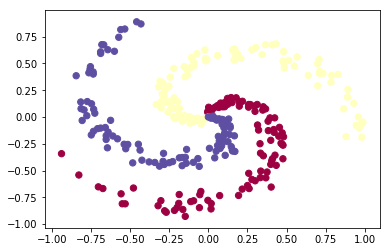

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N * K, D)) # data matrix
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap=plt.cm.Spectral)
plt.show()

Setup
====

In [3]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

Linear classifier training
====

In [4]:
num_examples = X.shape[0]

for i in range(200):
    # compute class scores for a linear classifier
    scores = np.dot(X, W) + b
    
    # get unnormalized probabilities
    exp_scores = np.exp(scores)
    
    # normalize them for each example
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(num_examples), y])

    # compute loss: average cross-entropy loss and regularization
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss

    if i % 10 == 0:
        print("Iteration: {} Loss: {}".format(i, loss))
        
    dscores = probs
    dscores[range(num_examples), y] -= 1 # p - 1 for correct class
    dscores /= num_examples

    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W

    W += -step_size * dW
    b += -step_size * db

Iteration: 0 Loss: 1.1010633056636465
Iteration: 10 Loss: 0.9035723446759842
Iteration: 20 Loss: 0.83065860785922
Iteration: 30 Loss: 0.7977574097224033
Iteration: 40 Loss: 0.7807240205658935
Iteration: 50 Loss: 0.7710717399099201
Iteration: 60 Loss: 0.7652532059112263
Iteration: 70 Loss: 0.7615870986797162
Iteration: 80 Loss: 0.7592000810180782
Iteration: 90 Loss: 0.7576063737459602
Iteration: 100 Loss: 0.7565212163236424
Iteration: 110 Loss: 0.7557706746738272
Iteration: 120 Loss: 0.755244958436204
Iteration: 130 Loss: 0.754872892589756
Iteration: 140 Loss: 0.7546073134274096
Iteration: 150 Loss: 0.7544163948195645
Iteration: 160 Loss: 0.7542783315292878
Iteration: 170 Loss: 0.7541779917670017
Iteration: 180 Loss: 0.7541047607085313
Iteration: 190 Loss: 0.7540511235582594


training accuracy: 0.52


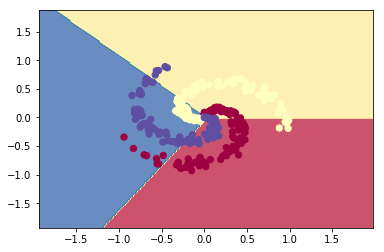

In [5]:
# evaluate accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: {}'.format(np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
#fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')
plt.show()

Neural network
===

In [6]:
# initialize parameters randomly
h = 100 # size of hidden layers
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

num_examples = X.shape[0]

for i in range(10000):
    # compute class scores for two layer neural network
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    
    # get unnormalized probabilities
    exp_scores = np.exp(scores)
    
    # normalize them for each example
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(num_examples), y])

    # compute loss: average cross-entropy loss and regularization
    data_loss = np.sum(correct_logprobs) / num_examples
    # note regularization changes here too!
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2*W2)
    loss = data_loss + reg_loss

    if i % 1000 == 0:
        print("Iteration: {} Loss: {}".format(i, loss))
        
    dscores = probs
    dscores[range(num_examples), y] -= 1 # p - 1 for correct class
    dscores /= num_examples
    
    # backpropagation for dW2 and db2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU
    dhidden[hidden_layer <= 0] = 0
    
    # first layer backprop
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
        
    # regularization
    dW2 += reg * W2
    dW += reg * W

    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

Iteration: 0 Loss: 1.0985364408289633
Iteration: 1000 Loss: 0.30595995350789984
Iteration: 2000 Loss: 0.2698509397687172
Iteration: 3000 Loss: 0.2555691466028196
Iteration: 4000 Loss: 0.2520271591251496
Iteration: 5000 Loss: 0.250702544781064
Iteration: 6000 Loss: 0.2501654651722134
Iteration: 7000 Loss: 0.2500247157611967
Iteration: 8000 Loss: 0.2499438033956244
Iteration: 9000 Loss: 0.24992617792485244


training accuracy: 0.98


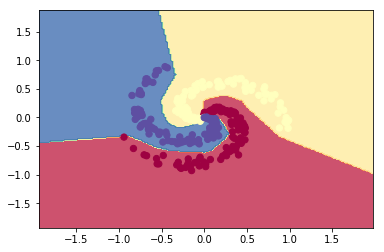

In [7]:
# evaluate accuracy
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
#fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')
plt.show()